In [9]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm
import numba as nb

No such comm: c5386e2cd23b4b5c8ab1cdd921aa14a3


In [10]:
Nx = 60
Nt = 500
Ny = 60
x = np.linspace(-5.,5.,Nx)
y = np.linspace(-5.,5.,Ny)
t = np.linspace(0.,10.,Nt)

dt = t[1] - t[0]
dx = x[1] - x[0]
dy = y[1] - y[0]

v1 = 0.3
v2 = 0.3

In [11]:
def ui(x,y):
    return [3/(np.cosh(0.2*(x-20)))**2,3/(np.cosh(0.2*(y-20)))**2]

In [12]:
def InitT():
    
    u = np.zeros((Nt,Nx,Ny))
    for i in range(Nx):
        for j in range(Ny):
            u[0,i,j] = 5*np.exp(-(x[i]**2 + y[j]**2))
    #u[0,:,:] = [ux,uy]
    #u[0,0,:] = uy
    
    return u

In [13]:
u = InitT()

In [14]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                u[l,i,j] = u[l-1,i,j] + dt*(-u[l-1,i,j]*(u[l-1,i+1,j]-u[l-1,i-1,j])/(2*dx) + v1*(u[l-1,i+1,j]-2*u[l-1,i,j]+u[l-1,i-1,j])/(dx**2)) \
                + dt*(-u[l-1,i,j]*(u[l-1,i,j+1]-u[l-1,i,j-1])/(2*dy) + v2*(u[l-1,i,j+1]-2*u[l-1,i,j]+u[l-1,i,j-1])/(dy**2))

In [15]:
GetSolution()

100%|██████████| 499/499 [00:06<00:00, 71.48it/s]


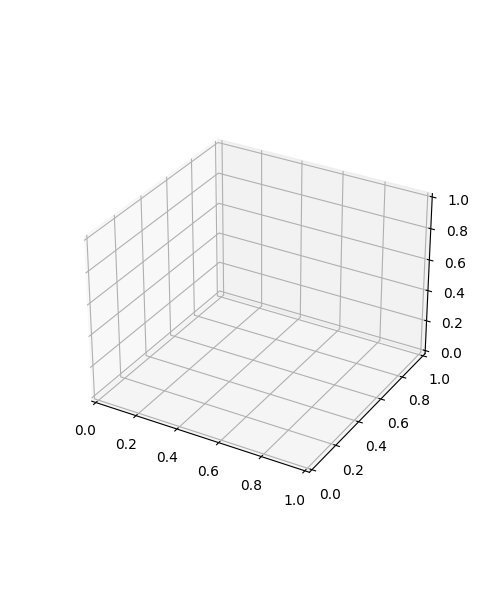

In [16]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(-5,5)
    ax.set_ylim3d(-5,5)
    ax.set_zlim3d(0,5)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,u[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)